In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.colab import files

In [ ]:
# Step 2: Upload dataset
print("📂 Please choose your CSV file...")
uploaded = files.upload()

📂 Please choose your CSV file...


Saving student-scores.csv to student-scores.csv


In [ ]:
# Get uploaded filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("\n✅ File loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print(df.head())


✅ File loaded successfully!
Shape of dataset: (2000, 17)
   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27   


Missing Values in Each Column:
id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


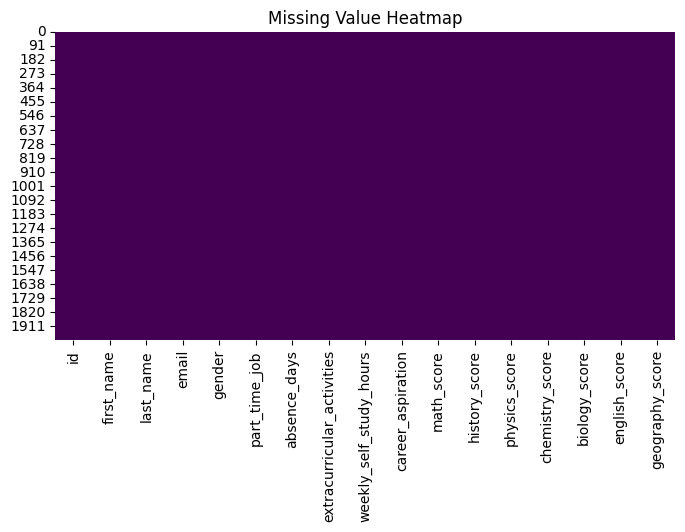

In [ ]:
# -------------------------------
# 1. Find Missing Values
# -------------------------------
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Heatmap for missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [ ]:
# -------------------------------
# 2. Imputation of Missing Values
# -------------------------------
# Numeric columns → fill with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


In [ ]:
# -------------------------------
# 3. Remove Duplicates
# -------------------------------
print(f"\nRows before removing duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Rows after removing duplicates: {len(df)}")


Rows before removing duplicates: 2000
Rows after removing duplicates: 2000


In [ ]:

# -------------------------------
# 4. Data Type Conversion
# -------------------------------
# Example conversions (edit as needed)
# df['some_column'] = df['some_column'].astype(int)
# df['date_column'] = pd.to_datetime(df['date_column'])

print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
id                             int64
first_name                    object
last_name                     object
email                         object
gender                        object
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
dtype: object


In [ ]:
# -------------------------------
# 5. Normalize Data
# -------------------------------
# Min–Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df[num_cols]), columns=num_cols)

# Z-score Standardization
scaler_zscore = StandardScaler()
df_zscore = pd.DataFrame(scaler_zscore.fit_transform(df[num_cols]), columns=num_cols)

print("\nFirst 5 Rows After Min–Max Normalization:")
print(df_minmax.head())

print("\nFirst 5 Rows After Z-score Standardization:")
print(df_zscore.head())


First 5 Rows After Min–Max Normalization:
         id  absence_days  weekly_self_study_hours  math_score  history_score  \
0  0.000000           0.3                     0.54    0.550000           0.62   
1  0.000500           0.2                     0.94    0.833333           0.72   
2  0.001001           0.9                     0.26    0.683333           0.94   
3  0.001501           0.5                     0.06    0.516667           0.48   
4  0.002001           0.5                     0.20    0.733333           0.54   

   physics_score  chemistry_score  biology_score  english_score  \
0           0.86             0.94       0.471429       0.612245   
1           0.92             1.00       0.857143       0.775510   
2           0.90             0.92       0.500000       0.551020   
3           0.76             0.60       0.842857       0.265306   
4           0.30             0.30       0.714286       0.489796   

   geography_score  
0            0.675  
1            0.750  
2   

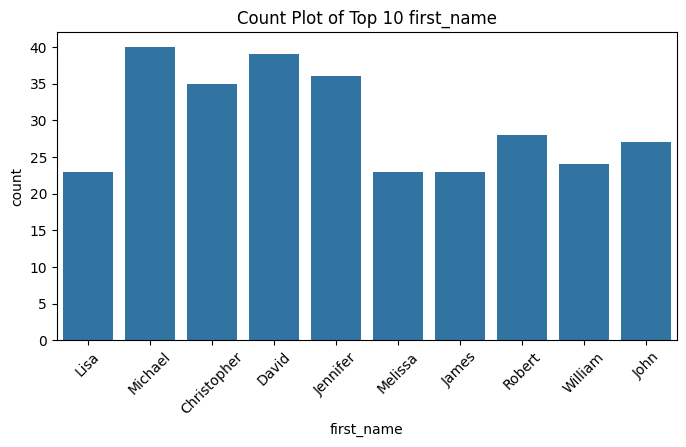

In [ ]:
if len(cat_cols) > 0:
    # Get the top 10 most frequent categories in the first categorical column
    top_categories = df[cat_cols[0]].value_counts().nlargest(10).index

    # Filter the dataframe to include only the top 10 categories
    filtered_df = df[df[cat_cols[0]].isin(top_categories)]

    # Plot the count plot for the top 10 categories
    plt.figure(figsize=(8, 4))
    sns.countplot(data=filtered_df, x=cat_cols[0])
    plt.title(f"Count Plot of Top 10 {cat_cols[0]}")
    plt.xticks(rotation=45)
    plt.show()